In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 200

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
to_dummy = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']

for vari in to_dummy:
    df = pd.concat([df, pd.get_dummies(df[vari],drop_first=True,prefix=vari)], axis=1)
    df.drop(vari, axis=1, inplace=True)

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [5]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [6]:
X = df.drop(['Revenue'],axis=1)
y = df.Revenue

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [8]:
std = StandardScaler()
std.fit(X_train)
X_train_st = std.transform(X_train)
X_test_st = std.transform(X_test)

X_train_st_Original = X_train_st
X_test_st_Original = X_test_st
y_train_Original = y_train
y_test_Original = y_test

ros = RandomOverSampler(random_state=0)

sample_dict = {}

X_train_st_Upsample, y_train_Upsample = ros.fit_sample(X_train_st,y_train)
X_train_st_Smote, y_train_Smote = SMOTE(random_state=42).fit_sample(X_train_st,y_train)
X_train_st_ADASYN, y_train_ADASYN = ADASYN(random_state=42).fit_sample(X_train_st,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [9]:
y.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [10]:
def print_summary(model,X,y):
    #print(f'{model}')
    print(f'f1 score: {f1_score(y, model.predict(X))}')
    print(f'precision score: {precision_score(y, model.predict(X))}')
    print(f'recall score: {recall_score(y, model.predict(X))}')
    print(f'log loss: {log_loss(y, model.predict(X))}')
    print(f'roc auc: {roc_auc_score(y, model.predict(X))}')
    print(f'conf matrix: \n {confusion_matrix(y, model.predict(X))}')

In [29]:
model_dict = {
    'Logistic Regression': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
            {
                #'multi_class': ['ovr', 'multinomial', 'auto'], 
                'C':list(10**np.linspace(-3,3,10))
            }
           ],
    'Random Forest': [RandomForestClassifier(n_estimators=200, max_depth=20,random_state=0),
            {
                'criterion': ['entropy'], 
                'max_depth': [10,15,20,None], 
                #'min_samples_split': [2,3,4,5], 
                'max_features': ['sqrt']}
           ],
    'Naive Bayes': [GaussianNB(),
            {}
           ],
    'K-Nearest-Neighbors': [KNeighborsClassifier(),
           {
                'n_neighbors': [3,5,11,21] #list(np.linspace(3,31,15).astype(int)),
                #'p': [1,2]
           }
           ]
#            ],
#     'svm': [SVC(gamma = 'scale'),
#            {
#                 'kernel': ['linear'], # 'poly', 'rbf', 'sigmoid']
#                 'C': list(10**np.linspace(-1,1,3)),
#                 'probability': [True]
#            }
#            ]
}

model_dict_simple = {
    'Logistic Regression': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),{}],
    'Random Forest': [RandomForestClassifier(random_state=0, n_estimators=200),{}],
    'Naive Bayes': [GaussianNB(),{}],
    'K-Nearest-Neighbors': [KNeighborsClassifier(),{}],
    'Support Vector Classifier': [SVC(random_state=0,probability=True),{}]
}

sample_list = ['Original', 'Upsample', 'Smote', 'ADASYN']

In [30]:
fit_dict = {}
cv_count = 3

for sample_style in sample_list:
    print(f'sample_style is {sample_style}')
    fit_dict[sample_style] = {}
    for nickname, model in model_dict.items():
        print(f'nickname is {nickname}')
        fit = GridSearchCV(model[0],model[1],cv=cv_count,scoring='roc_auc',iid=False,n_jobs = -1,verbose=1)
        exec('fit.fit(X_train_st_' + sample_style + ', y_train_' + sample_style + ').best_estimator_')
        fit_dict[sample_style][nickname] = fit
        
with open('fit_dict.pkl', 'wb') as handle:
    pickle.dump(fit_dict, handle)

sample_style is Original
nickname is log
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is rfc
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.7s finished


nickname is gnb
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


nickname is knn
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   42.8s finished


sample_style is Upsample
nickname is log
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is rfc
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   14.5s finished


nickname is gnb
Fitting 3 folds for each of 1 candidates, totalling 3 fits
nickname is knn
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.8min finished


sample_style is Smote
nickname is log
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is rfc
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   18.0s finished


nickname is gnb
Fitting 3 folds for each of 1 candidates, totalling 3 fits
nickname is knn
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.7min finished


sample_style is ADASYN
nickname is log
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is rfc
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.0s finished


nickname is gnb
Fitting 3 folds for each of 1 candidates, totalling 3 fits
nickname is knn
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.3min finished


In [31]:
with open('fit_dict.pkl', 'rb') as handle:
    fit_dict = pickle.load(handle)

In [32]:
fit_dict

{'Original': {'log': GridSearchCV(cv=3, error_score='raise-deprecating',
         estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=2000, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
            tol=0.0001, verbose=0, warm_start=False),
         fit_params=None, iid=False, n_jobs=-1,
         param_grid={'C': [0.001, 0.004641588833612777, 0.021544346900318832, 0.1, 0.46415888336127775, 2.154434690031882, 10.0, 46.41588833612773, 215.44346900318823, 1000.0]},
         pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
         scoring='roc_auc', verbose=1),
  'rfc': GridSearchCV(cv=3, error_score='raise-deprecating',
         estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=20, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
       

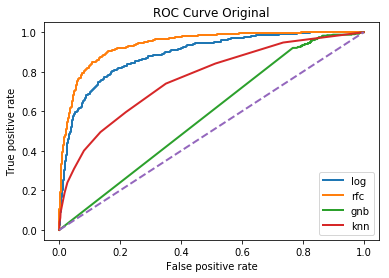

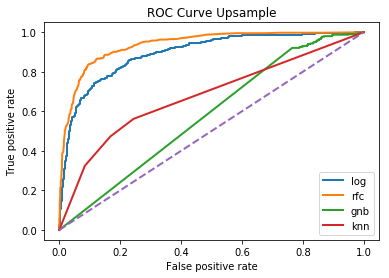

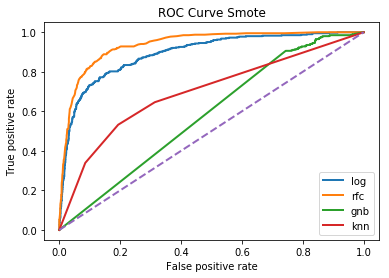

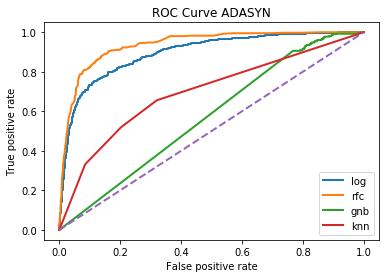

In [61]:
for sample_style, fits in fit_dict.items():
    plt.figure();
    for fit_name, fit in fits.items():
        fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(X_test_st)[:,1])
        plt.plot(fpr, tpr, lw = 2, label = fit_name)

    plt.plot([0,1],[0,1],ls='--', lw = 2)

    plt.legend(loc='lower right')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve ' + sample_style);
    plt.show()


In [ ]:
for sample_style, fits in fit_dict.items():
    for fit_name, fit in fits.items():
        print(sample_style)
        print(fit_name)
        print_summary(fit,X_test_st,y_test)

In [34]:
stacked = StackingClassifier(
    classifiers=[fit for fitname, fit in fit_dict['ADASYN'].items()], meta_classifier=RandomForestClassifier(), use_probas=True)

In [35]:
stacked.fit(X_train_st, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   41.6s finished
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
      ...re_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)],
          meta_classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_sec

In [37]:
print_summary(stacked,X_test_st,y_test)

f1 score: 0.678191489361702
precision score: 0.7327586206896551
recall score: 0.6311881188118812
log loss: 3.389480231196024
roc auc: 0.793043137970441
conf matrix: 
 [[1969   93]
 [ 149  255]]


In [40]:
print_summary(fit_dict['ADASYN']['rfc'],X_test_st,y_test)

f1 score: 0.7374562427071178
precision score: 0.6975717439293598
recall score: 0.7821782178217822
log loss: 3.151392633293934
roc auc: 0.8578689343231122
conf matrix: 
 [[1925  137]
 [  88  316]]


In [50]:
best_model = fit_dict['ADASYN']['rfc'].best_estimator_

In [62]:
important_features = pd.Series(best_model.feature_importances_).nlargest(10).index
for i in important_features:
    print(X.columns[i])

PageValues
Administrative
ProductRelated_Duration
ExitRates
ProductRelated
Administrative_Duration
BounceRates
Month_Nov
Informational
TrafficType_2


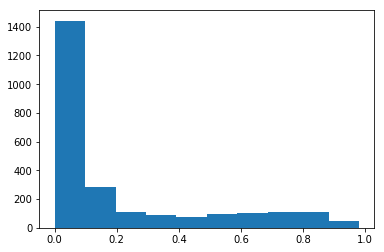

In [53]:
plt.hist(best_model.predict_proba(X_test_st)[:,1]);

In [60]:
# optimizing threshold
probabilities = best_model.predict_proba(X_test_st)[:,1]
reals = y_test
best_cost = -10**10
best_thresh = 0

for threshold in np.linspace(0,1,101):
    predictions = probabilities >= threshold
    tp = sum((reals == 1) & (predictions == 1))
    fp = sum((reals == 0) & (predictions == 1))
    tn = sum((reals == 0) & (predictions == 0))
    fn = sum((reals == 1) & (predictions == 0))
    tp_c = 2
    fp_c = -5
    tn_c = 0
    fn_c = -2
    cost = tp*tp_c + fp*fp_c + tn*tn_c + fn*fn_c
    if cost > best_cost:
        best_cost = cost
        best_thresh = threshold
    print(f'cost is {cost} and threshold is {threshold}')
    print(f'tp is {tp}, fp is {fp}, tn is {tn}, fn is {fn}')
        
print(f'Optimal threshold is: {best_thresh}')

cost is -9502 and threshold is 0.0
tp is 404, fp is 2062, tn is 0, fn is 0
cost is -7396 and threshold is 0.01
tp is 403, fp is 1640, tn is 422, fn is 1
cost is -6310 and threshold is 0.02
tp is 402, fp is 1422, tn is 640, fn is 2
cost is -5540 and threshold is 0.03
tp is 402, fp is 1268, tn is 794, fn is 2
cost is -4769 and threshold is 0.04
tp is 401, fp is 1113, tn is 949, fn is 3
cost is -4185 and threshold is 0.05
tp is 397, fp is 993, tn is 1069, fn is 7
cost is -3635 and threshold is 0.06
tp is 397, fp is 883, tn is 1179, fn is 7
cost is -3274 and threshold is 0.07
tp is 396, fp is 810, tn is 1252, fn is 8
cost is -2969 and threshold is 0.08
tp is 396, fp is 749, tn is 1313, fn is 8
cost is -2731 and threshold is 0.09
tp is 388, fp is 695, tn is 1367, fn is 16
cost is -2481 and threshold is 0.1
tp is 383, fp is 641, tn is 1421, fn is 21
cost is -2281 and threshold is 0.11
tp is 383, fp is 601, tn is 1461, fn is 21
cost is -2050 and threshold is 0.12
tp is 382, fp is 554, tn is 1

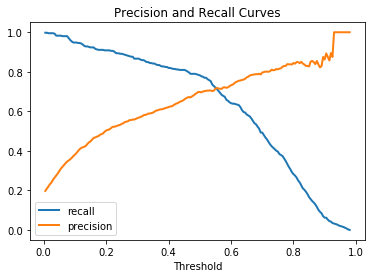

In [57]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model.predict_proba(X_test_st)[:,1])
plt.plot(threshold_curve, recall_curve[1:,], lw = 2, label = "recall")
plt.plot(threshold_curve, precision_curve[1:,], lw = 2, label = "precision")

plt.legend(loc='lower left')

plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');